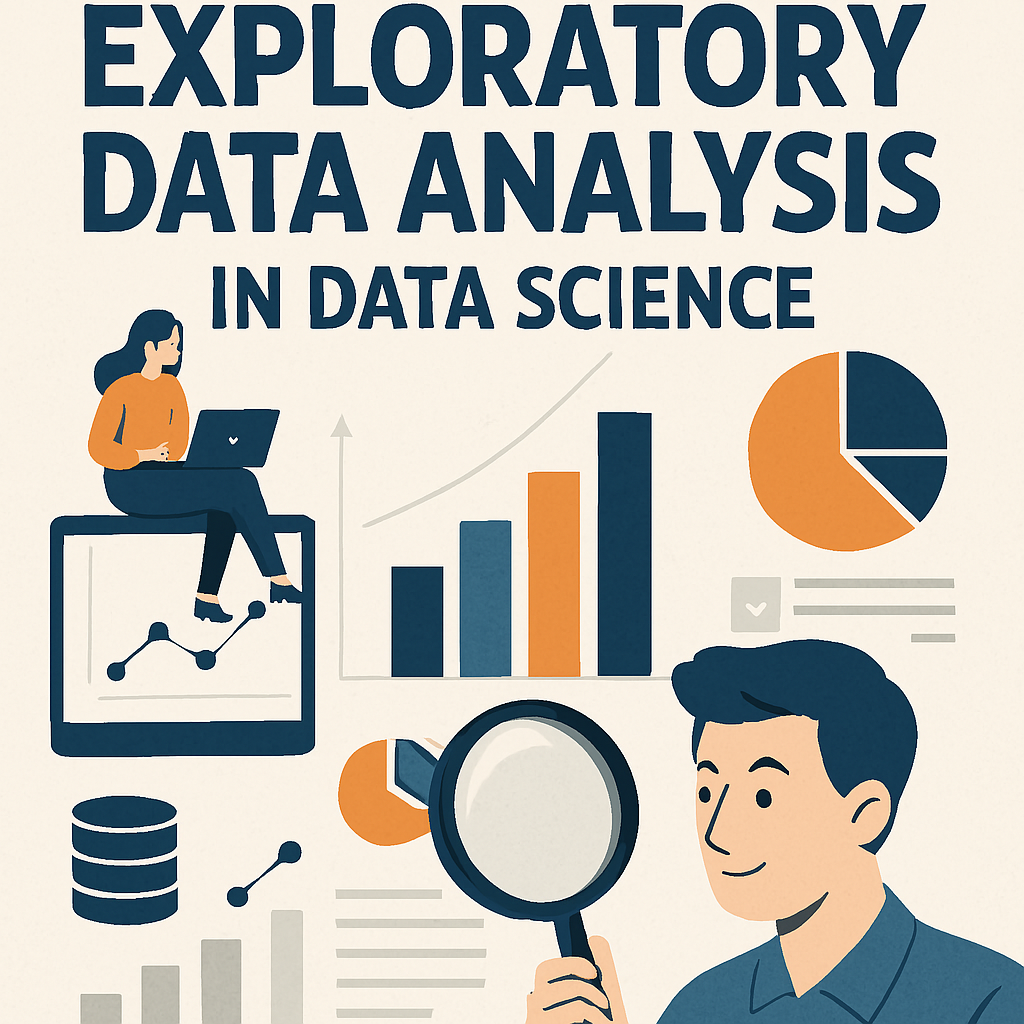

#Exploratory Data Analysis

Definisi : Proses untuk membersihkan data dan memproses data untuk mendapatkan insight dan membuat sebuah hypotesis


## Initial Exploration

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Baca dataset

In [3]:
data = pd.read_csv("/content/drive/MyDrive/DATASET/Module_ML_GDGOC_EDA/movie_sample_dataset.csv")

Mendapatkan info dari dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   color                 88 non-null     object 
 1   director_name         88 non-null     object 
 2   duration              99 non-null     int64  
 3   gross                 91 non-null     float64
 4   genres                98 non-null     object 
 5   movie_title           99 non-null     object 
 6   title_year            99 non-null     int64  
 7   language              99 non-null     object 
 8   country               99 non-null     object 
 9   budget                95 non-null     float64
 10  imdb_score            99 non-null     float64
 11  actors                99 non-null     object 
 12  movie_facebook_likes  99 non-null     int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 10.2+ KB


In [5]:
data.head()

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000


In [6]:
data.shape

(99, 13)

Explorasi info numerik dataset

In [7]:
data.describe()

,duration,gross,title_year,budget,imdb_score,movie_facebook_likes
count,99.000000,9.100000e+01,99.000000,9.500000e+01,99.000000,99.000000
mean,155.494949,1.541914e+08,1976.444444,1.048570e+08,6.892929,66045.707071
std,72.797927,1.399503e+08,255.880601,7.703169e+07,1.925514,58108.860365
min,-50.000000,4.122900e+04,202.000000,1.735000e+04,-7.500000,0.000000
25%,138.500000,4.720632e+07,2012.000000,4.000000e+07,6.550000,25000.000000
50%,143.000000,1.156040e+08,2013.000000,8.000000e+07,7.200000,54000.000000
75%,155.000000,2.374894e+08,2014.000000,1.740000e+08,7.850000,85500.000000
max,650.000000,6.232795e+08,2016.000000,2.500000e+08,8.800000,349000.000000


## Merangkum dataset

- Data biasanya dirangkum untuk memperoleh informasi tertentu untuk proses explorasi.
- Aggregasi (penggabungan) data bisa digunakan `groupby` untuk group data berdasarkan kategori.
- Fungsi aggregasi mengindikasikan bagaimana data dirangkum seperti (mean, median, min, max, std)

In [8]:
genre_summary = data.groupby('genres')['imdb_score'].agg(['mean', 'median', 'min', 'max', 'std'])

genre_summary

,mean,median,min,max,std
genres,,,,,
Action|Adventure|Drama,6.000000,6.10,5.8,6.1,0.173205
Action|Adventure|Drama|History,6.700000,6.70,6.7,6.7,NaN
Action|Adventure|Fantasy,6.850000,6.85,6.7,7.0,0.212132
Action|Adventure|Fantasy|Sci-Fi,6.950000,6.95,6.7,7.2,0.353553
Action|Adventure|Fantasy|Sci-Fi|Thriller,8.000000,8.00,8.0,8.0,NaN
Action|Adventure|Sci-Fi,7.310000,7.40,5.7,8.2,0.823880
Action|Adventure|Sci-Fi|Thriller,7.750000,7.75,6.7,8.8,1.484924
Action|Adventure|Thriller,7.275000,7.30,6.7,7.8,0.607591
Action|Adventure|Western,6.500000,6.50,6.5,6.5,NaN


#Data Cleaning

## **Missing value**

Masalah ini muncul karena adanya nilai yang hilang dari sebuah data dan biasanya direpresentasikan sebagai nilai **NaN** dalam library pandas. Jika terjadi maka data tersebut kurang representatif dan timbul keasalahpahaman.

Cek missing value

In [9]:
data.isnull().sum()

,0
color,11
director_name,11
duration,0
gross,8
genres,1
movie_title,0
title_year,0
language,0
country,0
budget,4


Cara menghandle missing value ada dua cara
1. Dropping

Penggunaan dropping (hapus) data diperlukan jika data yang hilang lebih dikit dari data keseluruhan atau kurang dari 5 % dari semua data.

```python
df.dropna(axis=0, inplace=True)
```
axis=0  berarti operasi dijalankan secara vertikal, menghapus baris yang mengandung setidaknya satu nilai NaN.
axis=1 berarti operasi dijalankan secara horizontal, menghapus kolom yang mengandung setidaknya satu nilai NaN.
Salah satu pertimbangan penting ialah penerapan metode ini dapat menyebabkan kita kehilangan banyak informasi.

2. Imputation

Imputasi bekerja dengan cara mengisi (*fill*) missing value dengan nilai tertentu. Hal ini tentunya akan mencegah hilangnya informasi akibat missing value.

Pada data kontinu, kita bisa menggunakan nilai mean dan median sebagai pengganti missing value. namun sebelumnya, perlu di cek terlebih dahulu distribusi dari datanya (menggunakan histogram). Imputasi menggunakan rata-rata ketika data berdistribusi normal dan median ketika data berdistribusi tidak normal (*skewness*). Jika bekerja menggunakan data kategoris, kita dapat mengisi missing value dengan modus.

```python
data.fillna(value=data.mean(), inplace=True)
```
jika Anda perhatikan metode ini masih memiliki banyak kekurangan salah satunya ialah dapat mempengaruhi variance atau sebaran dari sebuah data. Selain itu, metode ini juga masih belum cukup baik untuk diterapkan pada data time series.
Jika missing value 15% - 50% dapat dijadikan kandidat variabel tersebut dihapus, dilihat dulu hubungan dengan variabel yang lain. Jika missing value > 50% variabel tersebut dihapus.


In [10]:
data['color']=data['color'].fillna(data["color"].mode()[0])
data['director_name']=data['director_name'].fillna(data["director_name"].mode()[0])
data['genres']=data['genres'].fillna(data["genres"].mode()[0])

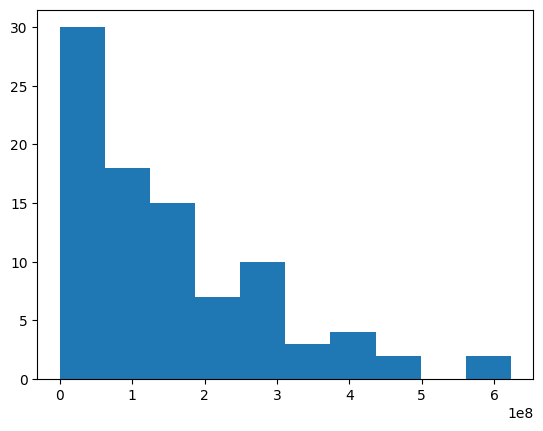

In [11]:
plt.hist(data['gross'])
plt.show()

Data memiliki skewness ke kanan, gunakan imputasi menggunakan median

In [12]:
#mengganti missing value variabel gross dengan median
data['gross']=data['gross'].fillna(data['gross'].median())

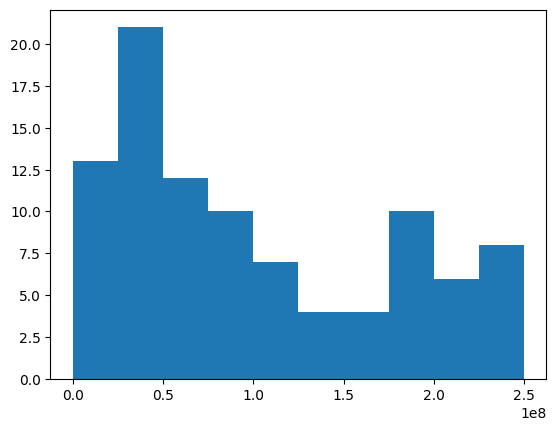

In [13]:
plt.hist(data['budget'])
plt.show()

## **Duplicate Data**

Data duplikat adalah data yang memiliki nilai yang sama pada kebanyakan kolom

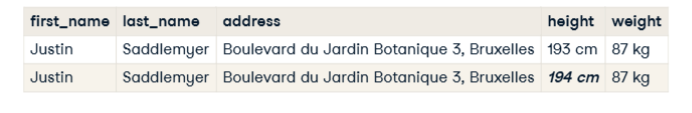

Source : (Datacamp)

Cek data duplikat

In [14]:
duplicates = data.duplicated()
print(duplicates)

0     False
1     False
2     False
3     False
4     False
      ...  
94    False
95    False
96    False
97    False
98    False
Length: 99, dtype: bool


In [15]:
data[duplicates]

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
9,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
21,Color,Tom Hooper,158,148775460.0,Drama|Musical|Romance,Les Misérables,2012,English,USA,61000000.0,7.6,"Hugh Jackman,Eddie Redmayne,Anne Hathaway",144000
31,Color,Ridley Scott,150,65007045.0,Action|Adventure|Drama,Exodus: Gods and Kings,2014,English,UK,140000000.0,6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000
53,Color,Sam Mendes,143,304360277.0,Action|Adventure|Thriller,Skyfall,2012,English,UK,200000000.0,7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000
55,Color,Baz Luhrmann,143,144812796.0,Drama|Romance,The Great Gatsby,2013,English,Australia,105000000.0,7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000
63,Color,Timur Bekmambetov,141,115603980.0,Adventure|Drama|History,Ben-Hur,2016,English,USA,100000000.0,6.1,"Morgan Freeman,Ayelet Zurer,Moises Arias",0


In [16]:
print(data.columns)

Index(['color', 'director_name', 'duration', 'gross', 'genres', 'movie_title',
       'title_year', 'language', 'country', 'budget', 'imdb_score', 'actors',
       'movie_facebook_likes'],
      dtype='object')


In [17]:
# Column names to check for duplication
column_names = ['color', 'director_name', 'duration', 'gross', 'genres', 'movie_title',
       'title_year', 'language', 'country', 'budget', 'imdb_score', 'actors',
       'movie_facebook_likes']
duplicates = data.duplicated(subset = column_names, keep = False)


In [18]:
data[duplicates].sort_values(by = 'director_name')

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
54,Color,Baz Luhrmann,143,144812796.0,Drama|Romance,The Great Gatsby,2013,English,Australia,105000000.0,7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000
55,Color,Baz Luhrmann,143,144812796.0,Drama|Romance,The Great Gatsby,2013,English,Australia,105000000.0,7.3,"Leonardo DiCaprio,Elizabeth Debicki,Steve Bisley",115000
8,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
9,Color,Joss Whedon,173,623279547.0,Action|Adventure|Sci-Fi,The Avengers,2012,English,USA,220000000.0,8.1,"Chris Hemsworth,Robert Downey Jr.,Scarlett Joh...",123000
30,Color,Ridley Scott,150,65007045.0,Action|Adventure|Drama,Exodus: Gods and Kings,2014,English,UK,140000000.0,6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000
31,Color,Ridley Scott,150,65007045.0,Action|Adventure|Drama,Exodus: Gods and Kings,2014,English,UK,140000000.0,6.1,"Christian Bale,María Valverde,Ben Mendelsohn",51000
52,Color,Sam Mendes,143,304360277.0,Action|Adventure|Thriller,Skyfall,2012,English,UK,200000000.0,7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000
53,Color,Sam Mendes,143,304360277.0,Action|Adventure|Thriller,Skyfall,2012,English,UK,200000000.0,7.8,"Albert Finney,Helen McCrory,Rory Kinnear",80000
61,Color,Timur Bekmambetov,141,115603980.0,Adventure|Drama|History,Ben-Hur,2016,English,USA,100000000.0,6.1,"Morgan Freeman,Ayelet Zurer,Moises Arias",0
63,Color,Timur Bekmambetov,141,115603980.0,Adventure|Drama|History,Ben-Hur,2016,English,USA,100000000.0,6.1,"Morgan Freeman,Ayelet Zurer,Moises Arias",0


Dalam kasus ini, karena datanya memang sama untuk di setiap kolom, maka kita bisa menghandle duplikate value dengan dropping

In [19]:
data.drop_duplicates(inplace = True)

In [20]:
duplicates = data.duplicated()
print(duplicates)

0     False
1     False
2     False
3     False
4     False
      ...  
94    False
95    False
96    False
97    False
98    False
Length: 93, dtype: bool


Apabila salah satu nilai data ada yang berbeda tapi kebanyakan sama di setiap kolom kita bisa menghandle nya dengan fungsi `agg` dan fungsi dan `groupby`. Contoh seperti berikut :

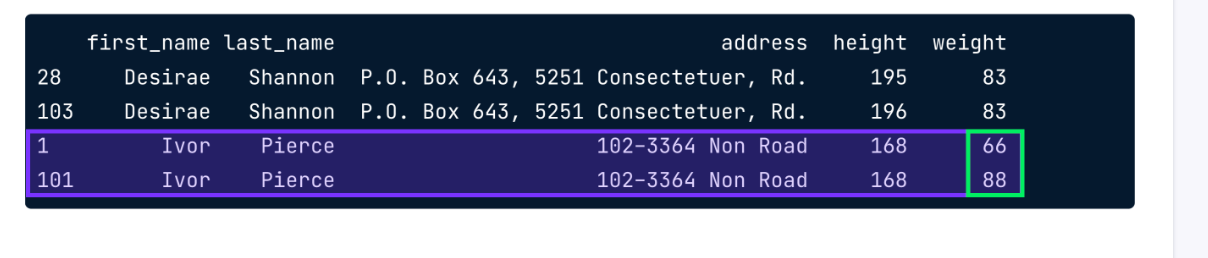

Source : (Datacamp)

Kita mengatasinya dengan kode berikut


```python
# Group by column names and produce statistical summaries
column_names = ['first_name','last_name','address'] #Karena dua kolom ini sama di data duplicate
summaries = {'height': 'max', 'weight': 'mean'} # Dikumpulkan dua data yang sama ddengan max di kolom heigt dan mean di kolom weight
height_weight = height_weight.groupby(by = column_names).agg(summaries).reset_index()
# Make sure aggregation is done
duplicates = height_weight.duplicated(subset = column_names, keep = False)height_weight[duplicates].sort_values(by = 'first_name')
```
Output =

```first_name    last_name    address    height    weight```



## **Outliers**


```
# This is formatted as code
```


Singkatnya outliers itu data yang jauh nilainya dari data point yang lainnya.

Contohnya, ketika ada harga rumah yang harusnya berada di rentang 3M, tiba-tiba ada harga rumah yang harganay sampai 1T. Kita harus mengamati apakah rumah itu mahal karena lokasinya yang strategis, bahan yang digunakan, atau ada pengalaman langka yang membuat rumah itu mahal.

Ada beberapa metode untuk mendeteksi outliers

1. IQR

Kita dapat mengetahui outliers secara otomatis, menggunakan Inter-Quartile yaitu selisih antara persentil ke 25 - persentil ke 75. Outliers akan dibagi menjadi upper outliers dan lower outliers
- Upper outliers > Persentile ke 75 + (IQR*1.5)
- Lower outliers > Persentile ke 25 - (IQR*1.5)

In [21]:
data1 = data

In [22]:
#Mencari IQR masing masing variabel
Q1_gross = data1['gross'].quantile(0.25)
Q3_gross = data1['gross'].quantile(0.75)
iqr_gross=Q3_gross-Q1_gross
print(iqr_gross)

Q1_imdb = data1['imdb_score'].quantile(0.25)
Q3_imdb = data1['imdb_score'].quantile(0.75)
iqr_imdb=Q3_imdb-Q1_imdb
print(iqr_imdb)

155546383.0
1.3000000000000007


In [23]:
#Mencari Upper dan Lower Limit Variabel Gross
upper_limit_gross = Q3_gross + 1.5 * iqr_gross
lower_limit_gross = Q1_gross - 1.5 * iqr_gross
print(upper_limit_gross)
print(lower_limit_gross)

436173507.5
-186012024.5


{'whiskers': [<matplotlib.lines.Line2D at 0x7fd895ec0b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fd895ec3190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fd895ecb390>],
 'medians': [<matplotlib.lines.Line2D at 0x7fd895ec1710>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fd895e8edd0>],
 'means': []}

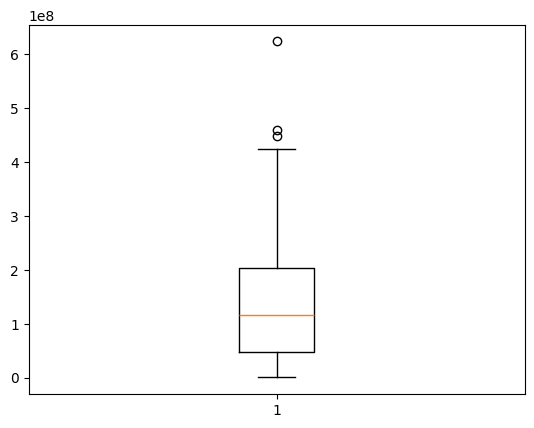

In [24]:
plt.boxplot(data1['gross'])

Apa yang perlu dilakukan untuk mengatasi outliers?

- Jika datanya akurat maka dropping outliers bisa dilakukan, mungkin ada kesalahan penginputan dan lain-lain
- Jika datanya memang ada outliers yang perlu diperhatikan, maka bisa menggunakan imputasi baik dengan mean, max, atau nilai yang lain berdasarkan kondisi data

# Transformasi Data

Transformasi data adalah proses mengubah data mentah agar lebih siap untuk dianalisis. Tujuannya bisa untuk:

- Meningkatkan kualitas data
- Membuat pola dalam data lebih mudah dikenali
- Meningkatkan performa model machine learning

Beberapa teknik umum transformasi data antara lain:


## 1. Smoothing (Mengurangi Noise)

Smoothing digunakan untuk mengurangi "noise" atau gangguan dalam data, terutama pada **data deret waktu (time series)**. Tujuannya supaya pola atau tren data jadi lebih mudah terlihat.

### Jenis-jenis smoothing:
- **Moving Average**: Cocok untuk data dengan frekuensi tinggi (contohnya data harian).
- **Exponential Smoothing**: Cocok untuk data yang punya pola tren atau musiman (seasonal).
- **Savitzky-Golay Filter**: Cocok untuk data yang fluktuatif tapi ingin tetap mempertahankan bentuk asli datanya.

Contoh visualisasi smoothing:

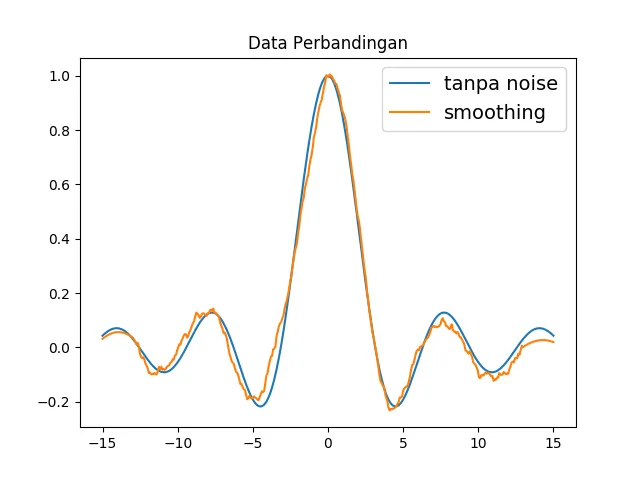

Sumber: [Radiokuantum – Savitzky-Golay](https://radiokuantum.wordpress.com/2018/06/22/mengenal-savitzky-golay-filter-dan-implementasinya-pada-python/)


## 2. Normalisasi

Normalisasi digunakan untuk menyamakan skala antar fitur. Misalnya, satu fitur memiliki rentang 0–100 dan yang lain 0–1 — perbedaan skala ini bisa membingungkan model jika tidak dinormalisasi.

### Jenis-jenis normalisasi:
- **Min-Max Scaling**: Mengubah nilai ke dalam rentang antara 0 dan 1.
- **Z-Score (Standarisasi)**: Mengubah nilai agar punya rata-rata 0 dan standar deviasi 1.


## 3. Encoding (Mengubah Kategori ke Angka)

Beberapa algoritma machine learning tidak bisa bekerja langsung dengan data kategorikal seperti "Laki-laki" atau "Perempuan". Maka, data perlu diubah menjadi angka terlebih dahulu.

### Metode encoding:
- **Label Encoding**: Setiap kategori diberi angka unik.  
  Contoh: `Laki-laki = 0`, `Perempuan = 1`
- **One-Hot Encoding**: Setiap kategori jadi kolom terpisah berisi 0 atau 1.  
  Contoh:  
  `['Laki-laki', 'Perempuan']` menjadi:
  - `Gender_Laki = 1`
  - `Gender_Perempuan = 0`


Smoothing

       Date      Open      High       Low     Close
0  04/09/25  37387.91  40778.70  37275.69  40608.45
1  04/08/25  38827.10  39426.60  37103.86  37645.59
2  04/07/25  37879.65  39207.02  36611.78  37965.60
3  04/04/25  40097.90  40097.90  38264.87  38314.86
4  04/03/25  40986.52  41173.62  40513.11  40545.93


<ipython-input-35-f31c9b3c8f1f>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


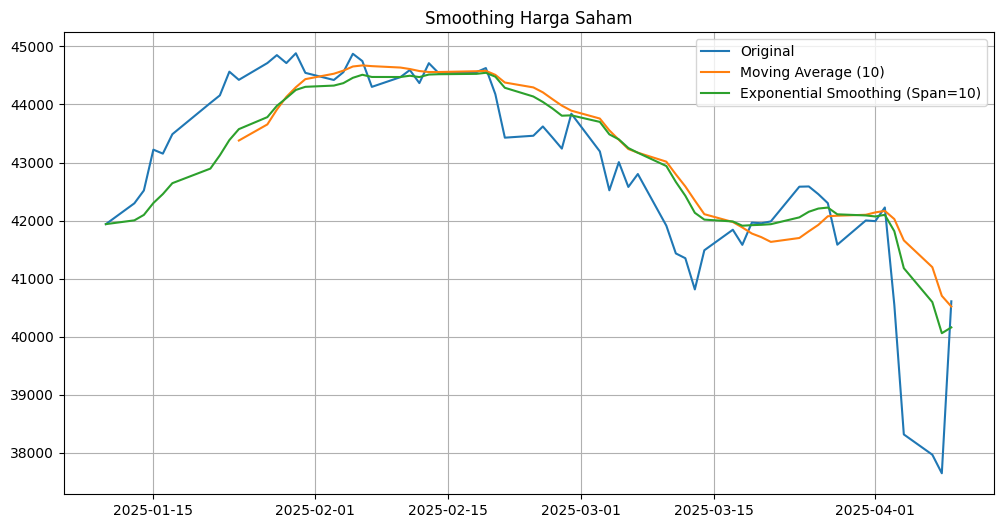

In [35]:
#Smoothing menggunakan moving average dan exponential smoothing.
df = pd.read_csv('/content/drive/MyDrive/DATASET/Module_ML_GDGOC_EDA/HistoricalPrices.csv')

# Tampilkan 5 baris pertama
print(df.head())

# Pastikan kolom tanggal & harga ada
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# Moving Average
df['MA_10'] = df[' Close'].rolling(window=10).mean()

# Exponential Smoothing
df['Exp_Smooth'] = df[' Close'].ewm(span=10, adjust=False).mean()

# Plot
plt.figure(figsize=(12,6))
plt.plot(df[' Close'], label='Original')
plt.plot(df['MA_10'], label='Moving Average (10)')
plt.plot(df['Exp_Smooth'], label='Exponential Smoothing (Span=10)')
plt.title('Smoothing Harga Saham')
plt.legend()
plt.grid(True)
plt.show()


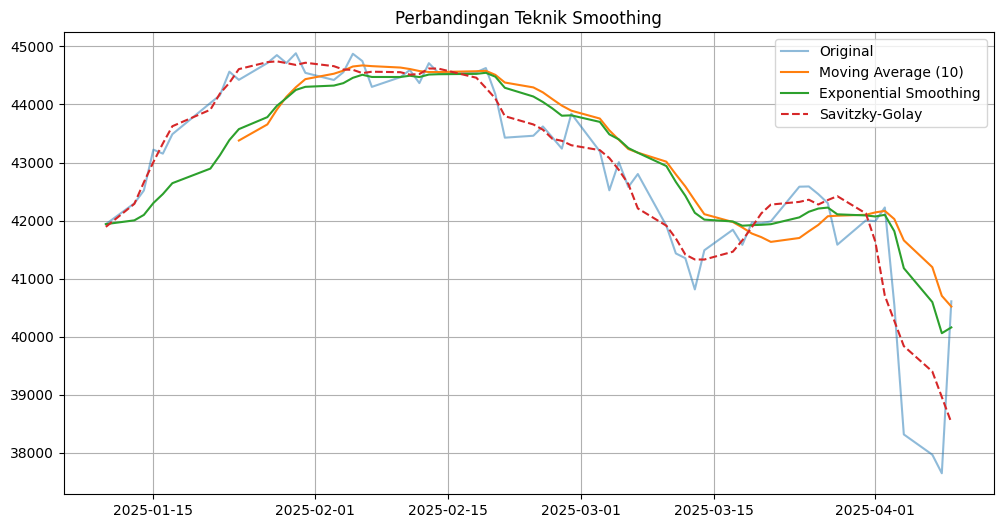

In [37]:
#Smoothing menggunakan Savitzky-Golay Filter
from scipy.signal import savgol_filter

# Terapkan Savitzky-Golay Filter
df['SavGol'] = savgol_filter(df[' Close'], window_length=11, polyorder=2)

# Plot semua smoothing
plt.figure(figsize=(12,6))
plt.plot(df[' Close'], label='Original', alpha=0.5)
plt.plot(df['MA_10'], label='Moving Average (10)')
plt.plot(df['Exp_Smooth'], label='Exponential Smoothing')
plt.plot(df['SavGol'], label='Savitzky-Golay', linestyle='--')
plt.title('Perbandingan Teknik Smoothing')
plt.legend()
plt.grid(True)
plt.show()


Normalisasi

In [45]:
data

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Color,Steve McQueen,134,56667870.0,Biography|Drama|History,12 Years a Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000
95,Color,Richard J. Lewis,134,7501404.0,Comedy|Drama,Barney's Version,2010,English,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0
96,Color,Paul Greengrass,134,107100855.0,Biography|Drama|Thriller,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000
97,Color,David Ayer,134,85707116.0,Action|Drama|War,Fury,2014,English,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000


In [47]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Pastikan kolom numerik ada
#Change column names to match your dataframe
numerik_cols = ['imdb_score', 'gross']

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_movie_minmax = data.copy()
df_movie_minmax[numerik_cols] = scaler_minmax.fit_transform(data[numerik_cols])

# Z-Score Standardization
scaler_z = StandardScaler()
df_movie_zscore = data.copy()
df_movie_zscore[numerik_cols] = scaler_z.fit_transform(data[numerik_cols])

# Tampilkan hasil
print("Min-Max Scaling:")
print(df_movie_minmax[numerik_cols].head())

print("\nZ-Score Standardization:")
print(df_movie_zscore[numerik_cols].head())

Min-Max Scaling:
   imdb_score     gross
0    0.963190  0.187449
1    0.901840  0.656171
2    0.944785  0.086765
3    0.858896  0.000008
4    0.944785  0.414471

Z-Score Standardization:
   imdb_score     gross
0    0.674145 -0.226205
1    0.165253  2.061920
2    0.521478 -0.717710
3   -0.190971 -1.141220
4    0.521478  0.882030


Encoding

In [49]:
data

,color,director_name,duration,gross,genres,movie_title,title_year,language,country,budget,imdb_score,actors,movie_facebook_likes
0,Color,Martin Scorsese,240,116866727.0,Biography|Comedy|Crime|Drama,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,"Leonardo DiCaprio,Matthew McConaughey,Jon Favreau",138000
1,Color,Shane Black,195,408992272.0,Action|Adventure|Sci-Fi,Iron Man 3,2013,English,USA,200000000.0,7.2,"Robert Downey Jr.,Jon Favreau,Don Cheadle",95000
2,color,Quentin Tarantino,187,54116191.0,Crime|Drama|Mystery|Thriller|Western,The Hateful Eight,2015,English,USA,44000000.0,7.9,"Craig Stark,Jennifer Jason Leigh,Zoë Bell",114000
3,Color,Kenneth Lonergan,186,46495.0,Drama,Margaret,2011,English,usa,14000000.0,6.5,"Matt Damon,Kieran Culkin,John Gallagher Jr.",0
4,Color,Peter Jackson,186,258355354.0,Adventure|Fantasy,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,"Aidan Turner,Adam Brown,James Nesbitt",83000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Color,Steve McQueen,134,56667870.0,Biography|Drama|History,12 Years a Slave,2013,English,USA,20000000.0,8.1,"Quvenzhané Wallis,Scoot McNairy,Taran Killam",83000
95,Color,Richard J. Lewis,134,7501404.0,Comedy|Drama,Barney's Version,2010,English,Canada,NaN,7.3,"Mark Addy,Atom Egoyan,Paul Gross",0
96,Color,Paul Greengrass,134,107100855.0,Biography|Drama|Thriller,Captain Phillips,2013,English,USA,55000000.0,7.9,"Tom Hanks,Chris Mulkey,Michael Chernus",65000
97,Color,David Ayer,134,85707116.0,Action|Drama|War,Fury,2014,English,USA,68000000.0,7.6,"Brad Pitt,Logan Lerman,Jim Parrack",82000


In [55]:
# Label Encoding Gender
data['Country_label'] = data['country'].astype('category').cat.codes

# One-Hot Encoding Genre
df_encoded = pd.get_dummies(data, columns=['genres'], prefix='genres')

display(df_encoded)

,color,director_name,duration,gross,movie_title,title_year,language,country,budget,imdb_score,...,genres_Drama|History|Thriller,genres_Drama|Horror|Thriller,genres_Drama|Musical|Romance,genres_Drama|Romance,genres_Drama|Sci-Fi,genres_Drama|Sport,genres_Drama|Thriller,genres_Drama|War,genres_Drama|Western,genres_Mystery|Thriller
0,Color,Martin Scorsese,240,116866727.0,The Wolf of Wall Street,2013,English,USA,100000000.0,8.2,...,False,False,False,False,False,False,False,False,False,False
1,Color,Shane Black,195,408992272.0,Iron Man 3,2013,English,USA,200000000.0,7.2,...,False,False,False,False,False,False,False,False,False,False
2,color,Quentin Tarantino,187,54116191.0,The Hateful Eight,2015,English,USA,44000000.0,7.9,...,False,False,False,False,False,False,False,False,False,False
3,Color,Kenneth Lonergan,186,46495.0,Margaret,2011,English,usa,14000000.0,6.5,...,False,False,False,False,False,False,False,False,False,False
4,Color,Peter Jackson,186,258355354.0,The Hobbit: The Desolation of Smaug,2013,English,USA,225000000.0,7.9,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Color,Steve McQueen,134,56667870.0,12 Years a Slave,2013,English,USA,20000000.0,8.1,...,False,False,False,False,False,False,False,False,False,False
95,Color,Richard J. Lewis,134,7501404.0,Barney's Version,2010,English,Canada,NaN,7.3,...,False,False,False,False,False,False,False,False,False,False
96,Color,Paul Greengrass,134,107100855.0,Captain Phillips,2013,English,USA,55000000.0,7.9,...,False,False,False,False,False,False,False,False,False,False
97,Color,David Ayer,134,85707116.0,Fury,2014,English,USA,68000000.0,7.6,...,False,False,False,False,False,False,False,False,False,False
